<font size='8'>Stock Market</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import os

In [3]:
start_date = "2000-03-15"
end_date = "2025-04-24"
stock_no = "0050.TW"

stock_3231_data = yf.download(stock_no, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock_3231_data.head()
stock_3231_data.columns

MultiIndex([( 'Close', '0050.TW'),
            (  'High', '0050.TW'),
            (   'Low', '0050.TW'),
            (  'Open', '0050.TW'),
            ('Volume', '0050.TW')],
           names=['Price', 'Ticker'])

In [5]:
stock_3231_data = stock_3231_data.droplevel("Ticker", axis=1)

In [6]:
stock_3231_data
# stock_3231_data.info()

Price,Close,High,Low,Open,Volume
Date,,,,,
2008-01-02,41.829411,41.829411,41.829411,41.829411,0
2008-01-03,41.048714,41.048714,41.048714,41.048714,0
2008-01-04,41.132359,41.132359,41.132359,41.132359,0
2008-01-07,39.306118,39.306118,39.306118,39.306118,0
2008-01-08,39.717369,39.717369,39.717369,39.717369,0
...,...,...,...,...,...
2025-04-17,160.550003,161.300003,159.449997,161.300003,18238993
2025-04-18,160.899994,161.800003,160.600006,161.399994,11083885
2025-04-21,158.600006,160.750000,158.500000,160.750000,15716878


In [7]:
stock_3231_data.columns.name = stock_no
stock_3231_data

0050.TW,Close,High,Low,Open,Volume
Date,,,,,
2008-01-02,41.829411,41.829411,41.829411,41.829411,0
2008-01-03,41.048714,41.048714,41.048714,41.048714,0
2008-01-04,41.132359,41.132359,41.132359,41.132359,0
2008-01-07,39.306118,39.306118,39.306118,39.306118,0
2008-01-08,39.717369,39.717369,39.717369,39.717369,0
...,...,...,...,...,...
2025-04-17,160.550003,161.300003,159.449997,161.300003,18238993
2025-04-18,160.899994,161.800003,160.600006,161.399994,11083885
2025-04-21,158.600006,160.750000,158.500000,160.750000,15716878


In [8]:
volume_mean = stock_3231_data['Volume'][stock_3231_data['Volume'] != 0].mean()
stock_3231_data.loc[stock_3231_data['Volume'] == 0, 'Volume'] = volume_mean
stock_3231_data

/var/folders/pd/_6zfwvss2hg_9s9x130fgssw0000gn/T/ipykernel_4999/1540037927.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7982398.784170854' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stock_3231_data.loc[stock_3231_data['Volume'] == 0, 'Volume'] = volume_mean


0050.TW,Close,High,Low,Open,Volume
Date,,,,,
2008-01-02,41.829411,41.829411,41.829411,41.829411,7.982399e+06
2008-01-03,41.048714,41.048714,41.048714,41.048714,7.982399e+06
2008-01-04,41.132359,41.132359,41.132359,41.132359,7.982399e+06
2008-01-07,39.306118,39.306118,39.306118,39.306118,7.982399e+06
2008-01-08,39.717369,39.717369,39.717369,39.717369,7.982399e+06
...,...,...,...,...,...
2025-04-17,160.550003,161.300003,159.449997,161.300003,1.823899e+07
2025-04-18,160.899994,161.800003,160.600006,161.399994,1.108388e+07
2025-04-21,158.600006,160.750000,158.500000,160.750000,1.571688e+07


In [9]:
avg_1 = 5
stock_3231_data[f'avg_of_{avg_1}_days'] = \
    stock_3231_data['Close'] \
        .rolling(window=avg_1) \
        .mean()

stock_3231_data

0050.TW,Close,High,Low,Open,Volume,avg_of_5_days
Date,,,,,,
2008-01-02,41.829411,41.829411,41.829411,41.829411,7.982399e+06,NaN
2008-01-03,41.048714,41.048714,41.048714,41.048714,7.982399e+06,NaN
2008-01-04,41.132359,41.132359,41.132359,41.132359,7.982399e+06,NaN
2008-01-07,39.306118,39.306118,39.306118,39.306118,7.982399e+06,NaN
2008-01-08,39.717369,39.717369,39.717369,39.717369,7.982399e+06,40.606794
...,...,...,...,...,...,...
2025-04-17,160.550003,161.300003,159.449997,161.300003,1.823899e+07,163.300003
2025-04-18,160.899994,161.800003,160.600006,161.399994,1.108388e+07,162.570001
2025-04-21,158.600006,160.750000,158.500000,160.750000,1.571688e+07,161.550003


In [10]:
avg_2 = 20
stock_3231_data[f'avg_of_{avg_2}_days'] = \
    stock_3231_data['Close'] \
        .rolling(window=avg_2) \
        .mean()

stock_3231_data

0050.TW,Close,High,Low,Open,Volume,avg_of_5_days,avg_of_20_days
Date,,,,,,,
2008-01-02,41.829411,41.829411,41.829411,41.829411,7.982399e+06,NaN,NaN
2008-01-03,41.048714,41.048714,41.048714,41.048714,7.982399e+06,NaN,NaN
2008-01-04,41.132359,41.132359,41.132359,41.132359,7.982399e+06,NaN,NaN
2008-01-07,39.306118,39.306118,39.306118,39.306118,7.982399e+06,NaN,NaN
2008-01-08,39.717369,39.717369,39.717369,39.717369,7.982399e+06,40.606794,NaN
...,...,...,...,...,...,...,...
2025-04-17,160.550003,161.300003,159.449997,161.300003,1.823899e+07,163.300003,171.0125
2025-04-18,160.899994,161.800003,160.600006,161.399994,1.108388e+07,162.570001,170.0300
2025-04-21,158.600006,160.750000,158.500000,160.750000,1.571688e+07,161.550003,168.7375


In [11]:
avg_3 = 60
stock_3231_data[f'avg_of_{avg_3}_days'] = \
    stock_3231_data['Close'] \
        .rolling(window=avg_3) \
        .mean()

stock_3231_data

0050.TW,Close,High,Low,Open,Volume,avg_of_5_days,avg_of_20_days,avg_of_60_days
Date,,,,,,,,
2008-01-02,41.829411,41.829411,41.829411,41.829411,7.982399e+06,NaN,NaN,NaN
2008-01-03,41.048714,41.048714,41.048714,41.048714,7.982399e+06,NaN,NaN,NaN
2008-01-04,41.132359,41.132359,41.132359,41.132359,7.982399e+06,NaN,NaN,NaN
2008-01-07,39.306118,39.306118,39.306118,39.306118,7.982399e+06,NaN,NaN,NaN
2008-01-08,39.717369,39.717369,39.717369,39.717369,7.982399e+06,40.606794,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-04-17,160.550003,161.300003,159.449997,161.300003,1.823899e+07,163.300003,171.0125,185.367068
2025-04-18,160.899994,161.800003,160.600006,161.399994,1.108388e+07,162.570001,170.0300,184.777284
2025-04-21,158.600006,160.750000,158.500000,160.750000,1.571688e+07,161.550003,168.7375,184.224788


In [12]:
stock_3231_data = stock_3231_data \
                    .dropna() \
                    .reset_index(drop=True)
stock_3231_data

0050.TW,Close,High,Low,Open,Volume,avg_of_5_days,avg_of_20_days,avg_of_60_days
0,42.805260,42.805260,42.805260,42.805260,7.982399e+06,42.491591,42.185244,40.890258
1,43.362900,43.362900,43.362900,43.362900,7.982399e+06,42.628212,42.212428,40.915816
2,43.077106,43.077106,43.077106,43.077106,7.982399e+06,42.764833,42.291891,40.949622
3,42.958611,42.958611,42.958611,42.958611,7.982399e+06,43.011584,42.346260,40.980060
4,43.815971,43.815971,43.815971,43.815971,7.982399e+06,43.203970,42.426768,41.055224
...,...,...,...,...,...,...,...,...
4180,160.550003,161.300003,159.449997,161.300003,1.823899e+07,163.300003,171.012500,185.367068
4181,160.899994,161.800003,160.600006,161.399994,1.108388e+07,162.570001,170.030000,184.777284
4182,158.600006,160.750000,158.500000,160.750000,1.571688e+07,161.550003,168.737500,184.224788
4183,155.949997,157.899994,155.949997,157.550003,1.891022e+07,159.670001,167.387500,183.608398


In [13]:
stock_3231_data.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'avg_of_5_days',
       'avg_of_20_days', 'avg_of_60_days'],
      dtype='object', name='0050.TW')

TODO: try adding Volume

In [14]:
stock_3231_data['Volume'].describe()

count    4.185000e+03
mean     7.982399e+06
std      7.782834e+06
min      1.644000e+03
25%      2.841807e+06
50%      6.719125e+06
75%      1.078088e+07
max      8.032683e+07
Name: Volume, dtype: float64

In [15]:
stock_3231_data[stock_3231_data['Volume'] > stock_3231_data['Volume'].quantile(0.66)]
stock_3231_data[stock_3231_data['Volume'] < stock_3231_data['Volume'].quantile(0.33)]

0050.TW,Close,High,Low,Open,Volume,avg_of_5_days,avg_of_20_days,avg_of_60_days
191,25.504715,25.504715,21.308530,24.514916,26338.0,23.348070,23.005823,23.399884
192,25.490772,25.504713,23.650586,25.504713,24377.0,24.015834,23.174507,23.370376
193,22.451677,24.305805,22.451677,24.187310,16672.0,23.886185,23.171370,23.264077
194,21.022743,23.566942,21.022743,23.420562,31357.0,23.476326,23.042069,23.139306
195,22.458647,22.667758,22.319238,22.605025,18391.0,23.385711,22.984912,23.054616
...,...,...,...,...,...,...,...,...
3860,126.155106,126.394853,126.011248,126.203058,2940436.0,125.685204,125.752333,121.692609
3876,126.730492,127.497686,126.682554,127.114096,3999671.0,128.034729,127.811763,124.205961
3927,153.974213,154.366763,152.992860,154.366763,3160348.0,154.435449,150.644975,138.290668
3965,167.418747,167.615014,166.142986,166.142986,3655076.0,166.064478,160.129749,154.711047


In [ ]:
def get_market_state(df):
    ### version 1
    # conditions = [
    #     # (df['avg_1'] > df['Close']) & (df['avg_2'] > df['Close']),
    #     # (df['avg_1'] < df['Close']) & (df['avg_2'] < df['Close']),
    #     # (df['avg_1'] == df['avg_2']),

    # ]
    # choices = ['up', 'down']
    # # choices = ['up', 'down', 'stable']
    # return np.select(conditions, choices, default='stable')
    ### version 2
    df[f'Trend_1'] = (df[f'avg_of_5_days'] - df[f'avg_of_20_days']) / df[f'avg_of_20_days']
    conditions = [
        (df[f'Trend_1'] > 0),
        (df[f'Trend_1'] < 0),
    ]
    choices = ['up', 'down']
    df[f'Trend_1'] = np.select(conditions, choices, default='stable')

    df[f'Trend_2'] = (df[f'avg_of_20_days'] - df[f'avg_of_60_days']) / df[f'avg_of_60_days']
    conditions = [
        (df[f'Trend_2'] > 0),
        (df[f'Trend_2'] < 0),
    ]
    choices = ['up', 'down']
    df[f'Trend_2'] = np.select(conditions, choices, default='stable')

    conditions = [
        (df['Volume'] > df['Volume'].quantile(0.66)),
        (df['Volume'] < df['Volume'].quantile(0.33)),
    ]
    choices = ['high', 'low']
    df['volume'] = np.select(conditions, choices, default='normal')


get_market_state(stock_3231_data)
stock_3231_data

0050.TW,Close,High,Low,Open,Volume,avg_of_5_days,avg_of_20_days,avg_of_60_days,Trend_1,Trend_2,volume
0,42.805260,42.805260,42.805260,42.805260,7.982399e+06,42.491591,42.185244,40.890258,up,up,normal
1,43.362900,43.362900,43.362900,43.362900,7.982399e+06,42.628212,42.212428,40.915816,up,up,normal
2,43.077106,43.077106,43.077106,43.077106,7.982399e+06,42.764833,42.291891,40.949622,up,up,normal
3,42.958611,42.958611,42.958611,42.958611,7.982399e+06,43.011584,42.346260,40.980060,up,up,normal
4,43.815971,43.815971,43.815971,43.815971,7.982399e+06,43.203970,42.426768,41.055224,up,up,normal
...,...,...,...,...,...,...,...,...,...,...,...
4180,160.550003,161.300003,159.449997,161.300003,1.823899e+07,163.300003,171.012500,185.367068,down,down,high
4181,160.899994,161.800003,160.600006,161.399994,1.108388e+07,162.570001,170.030000,184.777284,down,down,high
4182,158.600006,160.750000,158.500000,160.750000,1.571688e+07,161.550003,168.737500,184.224788,down,down,high
4183,155.949997,157.899994,155.949997,157.550003,1.891022e+07,159.670001,167.387500,183.608398,down,down,high


In [17]:
stock_3231_data['Trend_1'].unique()

array(['up', 'down'], dtype=object)

In [18]:
stock_3231_data['Trend_2'].unique()

array(['up', 'down'], dtype=object)

<Axes: title={'center': 'week-month'}, ylabel='count'>

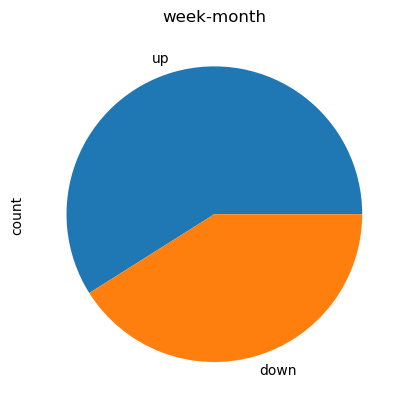

In [19]:
stock_3231_data['Trend_1'].value_counts().plot(kind='pie', title='week-month')

<Axes: title={'center': 'month-season'}, ylabel='count'>

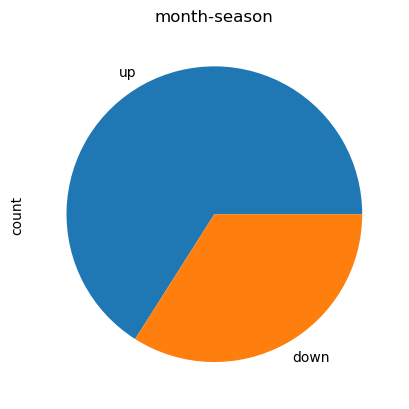

In [20]:
stock_3231_data['Trend_2'].value_counts().plot(kind='pie', title='month-season')

<Axes: title={'center': 'volume status'}, ylabel='count'>

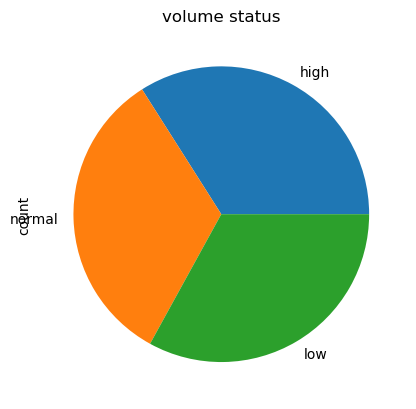

In [21]:
stock_3231_data['volume'].value_counts().plot(kind='pie', title='volume status')

In [3]:
import itertools

TRENDS = ['up', 'down', 'stable']
VOLUME_STATUS = ['high', 'low', 'normal']
PORTFOLIO_STATUS = ['empty', 'holding']

ACTIONS = ['buy', 'sell', 'hold']

## version 2: two trend
# STATES = list(itertools.product(TRENDS, TRENDS, PORTFOLIO_STATUS))
## version 1: one trend
STATES = list(itertools.product(TRENDS, VOLUME_STATUS, PORTFOLIO_STATUS))
STATES


[('up', 'high', 'empty'),
 ('up', 'high', 'holding'),
 ('up', 'low', 'empty'),
 ('up', 'low', 'holding'),
 ('up', 'normal', 'empty'),
 ('up', 'normal', 'holding'),
 ('down', 'high', 'empty'),
 ('down', 'high', 'holding'),
 ('down', 'low', 'empty'),
 ('down', 'low', 'holding'),
 ('down', 'normal', 'empty'),
 ('down', 'normal', 'holding'),
 ('stable', 'high', 'empty'),
 ('stable', 'high', 'holding'),
 ('stable', 'low', 'empty'),
 ('stable', 'low', 'holding'),
 ('stable', 'normal', 'empty'),
 ('stable', 'normal', 'holding')]

In [23]:
stock_3231_data = stock_3231_data[['Close', 'volume', 'Trend_1', 'Trend_2']]
stock_3231_data

0050.TW,Close,volume,Trend_1,Trend_2
0,42.805260,normal,up,up
1,43.362900,normal,up,up
2,43.077106,normal,up,up
3,42.958611,normal,up,up
4,43.815971,normal,up,up
...,...,...,...,...
4180,160.550003,high,down,down
4181,160.899994,high,down,down
4182,158.600006,high,down,down
4183,155.949997,high,down,down


<font size='6' color='lightblue'>Q-learning & SARSA</font>

In [24]:
class RLAgent:
    def __init__(self, *, policy, action_policy,
                 alpha=0.001, gamma=0.9,
                 epsilon=1, eps_dec=1e-3, eps_min=0.1,
                 tau=1, tau_dec=1e-3, tau_min=0.3,
                 episodes=1000,
                 STATES, ACTIONS):
        self.policy = policy
        self.action_policy = action_policy
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_dec = float(eps_dec)
        self.eps_min = eps_min
        self.tau = tau
        self.tau_dec = float(tau_dec)
        self.tau_min = tau_min
        self.episodes = episodes
        self.STATES = STATES
        self.ACTIONS = ACTIONS
        self.Q_table = {s: {a: 0 for a in self.ACTIONS} for s in self.STATES}

    def get_reward(self, current_price, previous_price, buy_price, state, action):
        trend_1, trend_2, portfolio = state
        ## version 2
        # invalid action
        if action == 'buy' and portfolio == 'holding':
            return -1
        
        if action == 'sell' and portfolio == 'empty':
            return -1

        # valid action
        if action == 'buy':
            r = 0.03

        elif action == 'sell':
            r = (current_price - buy_price) / buy_price
            if portfolio == 'holding':
                r += (current_price - previous_price) / previous_price

        else : # hold
            r = (current_price - previous_price) / previous_price
            if portfolio == 'holding':
                r += (current_price - buy_price) / buy_price
                if self.policy == 'sarsa':
                    r *= 10
                else :
                    r *= 5

            if portfolio == 'empty':
                r *= -1

        return r

    def choose_action(self, action_policy, state, *, evaluate=False) -> str:
        if action_policy == 'epsilon_greedy':
            # set epsilon
            epsilon = self.epsilon if evaluate == False else 0

            if np.random.rand() < epsilon:
                # exploration
                return np.random.choice(ACTIONS)
            else :
                # exploitation
                return max(self.Q_table[state], key=self.Q_table[state].get)
        
        else : # action_policy == 'softmax_method'
            tau = self.tau if evaluate is False else 0.001

            q_values = np.fromiter(self.Q_table[state].values(), dtype=np.float64)
            exp_q_values = np.exp(q_values / tau)
            probs_actions = exp_q_values / np.sum(exp_q_values)
            
            return np.random.choice(ACTIONS, p=probs_actions)


    def update_Q_table(self, state, action, reward,
                       next_state, next_action=None):
        if self.policy == 'sarsa' and next_action is None:
            raise ValueError("Must provide next state when using SARSA")

        if self.policy == 'sarsa': # Sarsa
            best_next_action = next_action
        else : # Q-learning
            best_next_action = max(self.Q_table[next_state],
                                   key=self.Q_table[next_state].get)

        self.Q_table[state][action] += self.alpha * (
            reward \
            + self.gamma * self.Q_table[next_state][best_next_action] \
            - self.Q_table[state][action]
        )

    def train(self, df):
        print(f"{self.policy} agent:")
        close_prices = df['Close'].values
        feature_cols = df.loc[:, ['Trend_1', 'volume']].values
        for episode in range(self.episodes):
            if episode % 100 == 0:
                if self.action_policy == 'epsilon_greedy':
                    print(f"    episode {episode:>3} progressing, epsilon {self.epsilon:.4f}...")
                else :
                    print(f"    episode {episode:>3} progressing, tau {self.tau:.4f}...")
                
            index = 1

            ## Initialize protfolio status
            portfolio = 'empty'
            buy_price = 0

            # first state and action
            state = (*feature_cols[index], portfolio)
            action = self.choose_action(self.action_policy, state)

            # go through the whole df rows
            while index < len(df) - 1:
                current_price = close_prices[index]
                previous_price = close_prices[index - 1]

                # get reward
                reward = self.get_reward(current_price, previous_price,
                                         buy_price, state, action)

                # execute action
                if action == 'buy' and portfolio == 'empty':
                    portfolio = 'holding'
                    buy_price = current_price
                elif action == 'sell' and portfolio == 'holding':
                    portfolio = 'empty'
                    buy_price = 0

                ## get new state
                next_state = (*feature_cols[index + 1], portfolio)

                ## set next action & action
                if self.policy == 'q_learning':
                    next_action = None
                else : # sarsa
                    next_action = self.choose_action(self.action_policy, next_state)

                # update Q table
                self.update_Q_table(state, action, reward, next_state, next_action)

                # move to next state and action
                state = next_state
                if self.policy == 'sarsa':
                    action = next_action
                else : # q-learning
                    action = self.choose_action(self.action_policy, state)

                index += 1
            
            ###
            # self._decay_epsilon()
            # def _decay_epsilon(self):
            ## version 1: fast drop at the beginning
            # self.epsilon = self.epsilon * (1 - self.eps_dec) \
            #     if self.epsilon > self.eps_min \
            #     else self.eps_min
            ## version 2: gradually drop
            if self.action_policy == 'epsilon_greedy':
                self.epsilon = self.epsilon - self.eps_dec \
                                if self.epsilon > self.eps_min \
                                else self.eps_min
            else : # softmax_method
                self.tau = self.tau - self.tau_dec \
                            if self.tau > self.tau_min \
                            else self.tau_min
            

        print("=" * 10, "Finished Training", "=" * 10)
            
    def evaluate_learning(self, df, initial_cash=10000):
        index = 1

        ## Initial status
        # holding from begin
        cash_holding = initial_cash
        shares_holding = 0
        # q
        cash = initial_cash
        shares = 0 # number of holding
        portfolio = 'empty'
        
        # holding from begin
        shares_holding = cash_holding // df.loc[index, 'Close']
        cash_holding -= shares_holding * df.loc[index, 'Close']

        ## document
        values_holding = []
        values_learning = []

        while index < len(df):
            current_price = df.loc[index, 'Close']

            # set state & action
            state = (*df[['Trend_1', 'volume']].iloc[index], portfolio)
            action = self.choose_action(self.action_policy, state, evaluate=True)

            # print(action)
            # print(action_sarsa)
            # print("=" * 50)

            ## execute action
            if action == 'buy' and portfolio == 'empty':
                shares = cash // current_price
                cash -= shares * current_price
                portfolio = 'holding'
            elif action == 'sell' and portfolio == 'holding':
                cash += shares * current_price
                shares = 0
                portfolio = 'empty'

            values_holding.append(cash_holding + shares_holding * df.loc[index, 'Close'])
            values_learning.append(cash + shares * df.loc[index, 'Close'])

            index += 1

        ## plot fig
        
        plt.plot(values_holding, label="holding", alpha=0.3, linestyle='--')
        plt.plot(values_learning, label=f"{self.policy} {self.action_policy}")
        plt.xlabel('Holding Days')
        plt.ylabel('Portfolio value')
        plt.title(f"{stock_no}")

        apc = 100 * (values_learning[-1] - initial_cash) / initial_cash
        hpc = 100 * (values_holding[-1] - initial_cash) / initial_cash
        cpc = 100 * (values_learning[-1] - values_holding[-1]) / values_holding[-1]
        apc_c = 'green' if apc >= 0 else 'red'
        hpc_c = 'green' if hpc >= 0 else 'red'
        cpc_c = 'green' if cpc >= 0 else 'red'

        text_diff = 3000 if cpc >= 0 else -3000
        plt.annotate(
            f"Agent: {values_learning[-1]:.0f}",
            xy=(len(values_learning), values_learning[-1]),
            xytext=(len(values_learning) + 500, values_learning[-1] + text_diff),
            fontsize=12,
            ha='left',
            va='center',
            arrowprops={
                'arrowstyle': "->",
                'color': 'orange',
                'alpha': 0.5,
            })
        plt.annotate(
            f"Holding: {values_holding[-1]:.0f}",
            xy=(len(values_holding), values_holding[-1]),
            xytext=(len(values_holding) + 500, values_holding[-1] - text_diff),
            fontsize=12,
            ha='left',
            va='center',
            arrowprops={
                'arrowstyle': "->",
                'color': 'blue',
                'alpha': 0.3,
            })

        plt.figtext(1.2, 0.8, 'Cash Percentage Change', fontsize=12)
        plt.figtext(1.25, 0.75, f'agent growth:    {apc:^+9.2f} %', fontsize=12, color=apc_c)
        plt.figtext(1.25, 0.7,  f'holding growth:  {hpc:^+9.2f} %', fontsize=12, color=hpc_c)
        plt.figtext(1.25, 0.65, f'relative change: {cpc:^+9.2f} %', fontsize=12, color=cpc_c)
        plt.legend()
        # plt.tight_layout()

        ## save fig
        images_dir = os.path.join(os.getcwd(), 'images')
        os.makedirs(images_dir, exist_ok=True)
        fig_fname = f'{self.policy}_{self.action_policy}.png'
        plt.savefig(os.path.join(images_dir, fig_fname), bbox_inches='tight')

        ## show fig
        plt.show()

        print(f"Final value holding:\n \
                cash={cash_holding}\n \
                shares={shares_holding * df['Close'].iloc[-1]}\n \
                Value={values_holding[-1]}")
        print(f"Final value {self.policy}:\n \
                cash={cash}\n \
                shares={shares * df['Close'].iloc[-1]}\n \
                Value={values_learning[-1]}")



In [25]:
a = {
    'a': 10,
    'b': 12,
    'c': 14,
}
a = np.fromiter(a.values(), dtype=np.float32)
a

array([10., 12., 14.], dtype=float32)

In [26]:
def show_q_table(agent):
    for k in agent.Q_table.keys():
        best_action = max(agent.Q_table[k], key=agent.Q_table[k].get)
        print(f"{str(k):<31} -> {best_action:<8}", end='')
        for i, v in agent.Q_table[k].items():
            print(f"{i:<4}: {v:+.4f}", end='  ')

        print()

q_learning agent:
    episode   0 progressing, epsilon 1.0000...
    episode 100 progressing, epsilon 0.9000...
    episode 200 progressing, epsilon 0.8000...
    episode 300 progressing, epsilon 0.7000...
    episode 400 progressing, epsilon 0.6000...
    episode 500 progressing, epsilon 0.5000...
    episode 600 progressing, epsilon 0.4000...
    episode 700 progressing, epsilon 0.3000...
    episode 800 progressing, epsilon 0.2000...
    episode 900 progressing, epsilon 0.1000...
========== Finished Training ==========
('up', 'high', 'empty')         -> buy     buy : +1.0547  sell: -0.3816  hold: +0.6128  
('up', 'high', 'holding')       -> hold    buy : +0.0019  sell: +0.9362  hold: +1.1973  
('up', 'low', 'empty')          -> buy     buy : +1.0128  sell: -0.4172  hold: +0.5803  
('up', 'low', 'holding')        -> hold    buy : -0.0335  sell: +0.9028  hold: +1.0986  
('up', 'normal', 'empty')       -> buy     buy : +1.0286  sell: -0.4136  hold: +0.5952  
('up', 'normal', 'holding')

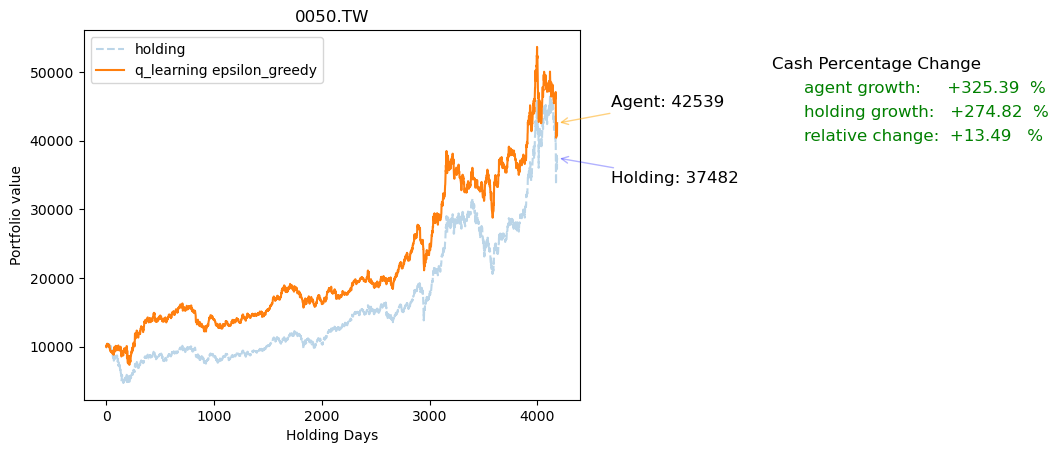

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value q_learning:
                 cash=42538.646953582764
                 shares=0.0
                 Value=42538.646953582764


In [27]:
q_eps_agent = RLAgent(policy='q_learning',
                      action_policy='epsilon_greedy',
                      gamma=0.9,
                      STATES=STATES, ACTIONS=ACTIONS)
q_eps_agent.train(stock_3231_data)
show_q_table(q_eps_agent)
q_eps_agent.evaluate_learning(stock_3231_data)

q_learning agent:
    episode   0 progressing, tau 1.0000...
    episode 100 progressing, tau 0.9000...
    episode 200 progressing, tau 0.8000...
    episode 300 progressing, tau 0.7000...
    episode 400 progressing, tau 0.6000...
    episode 500 progressing, tau 0.5000...
    episode 600 progressing, tau 0.4000...
    episode 700 progressing, tau 0.3000...
    episode 800 progressing, tau 0.3000...
    episode 900 progressing, tau 0.3000...
========== Finished Training ==========
('up', 'high', 'empty')         -> buy     buy : +0.2309  sell: -0.7980  hold: +0.1991  
('up', 'high', 'holding')       -> hold    buy : -0.7953  sell: +0.2109  hold: +0.2403  
('up', 'low', 'empty')          -> buy     buy : +0.2046  sell: -0.8164  hold: +0.1866  
('up', 'low', 'holding')        -> sell    buy : -0.8282  sell: +0.1887  hold: +0.1836  
('up', 'normal', 'empty')       -> buy     buy : +0.2159  sell: -0.8054  hold: +0.1953  
('up', 'normal', 'holding')     -> sell    buy : -0.8134  sell: +0.

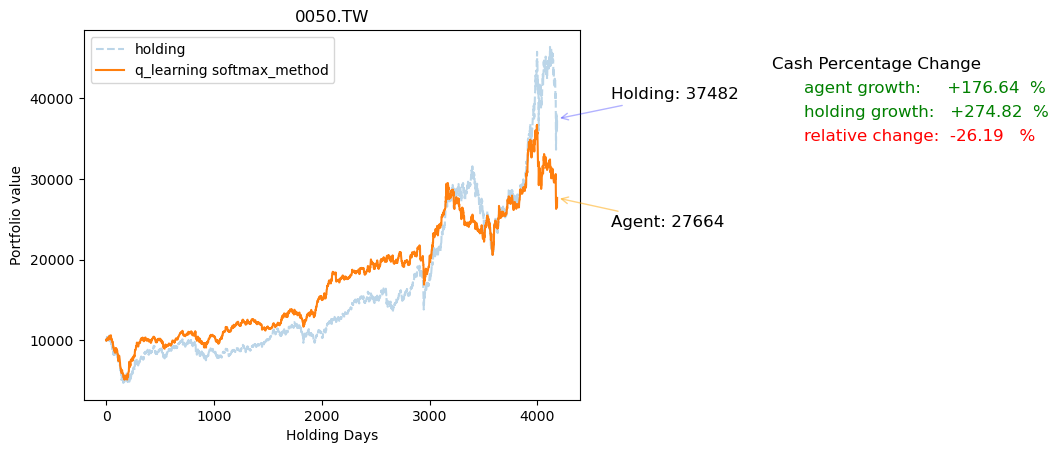

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value q_learning:
                 cash=27664.058320999146
                 shares=0.0
                 Value=27664.058320999146


In [28]:
q_soft_agent = RLAgent(policy='q_learning',
                       action_policy='softmax_method',
                       gamma=0.9,
                       STATES=STATES, ACTIONS=ACTIONS)
q_soft_agent.train(stock_3231_data)
show_q_table(q_soft_agent)
q_soft_agent.evaluate_learning(stock_3231_data)

sarsa agent:
    episode   0 progressing, epsilon 1.0000...
    episode 100 progressing, epsilon 0.9000...
    episode 200 progressing, epsilon 0.8000...
    episode 300 progressing, epsilon 0.7000...
    episode 400 progressing, epsilon 0.6000...
    episode 500 progressing, epsilon 0.5000...
    episode 600 progressing, epsilon 0.4000...
    episode 700 progressing, epsilon 0.3000...
    episode 800 progressing, epsilon 0.2000...
    episode 900 progressing, epsilon 0.1000...
========== Finished Training ==========
('up', 'high', 'empty')         -> buy     buy : +0.6521  sell: -0.9665  hold: +0.0111  
('up', 'high', 'holding')       -> hold    buy : -0.4181  sell: +0.4123  hold: +0.9640  
('up', 'low', 'empty')          -> buy     buy : +0.5808  sell: -0.9947  hold: +0.0102  
('up', 'low', 'holding')        -> hold    buy : -0.4710  sell: +0.3744  hold: +0.8432  
('up', 'normal', 'empty')       -> buy     buy : +0.5986  sell: -1.0066  hold: +0.0031  
('up', 'normal', 'holding')     

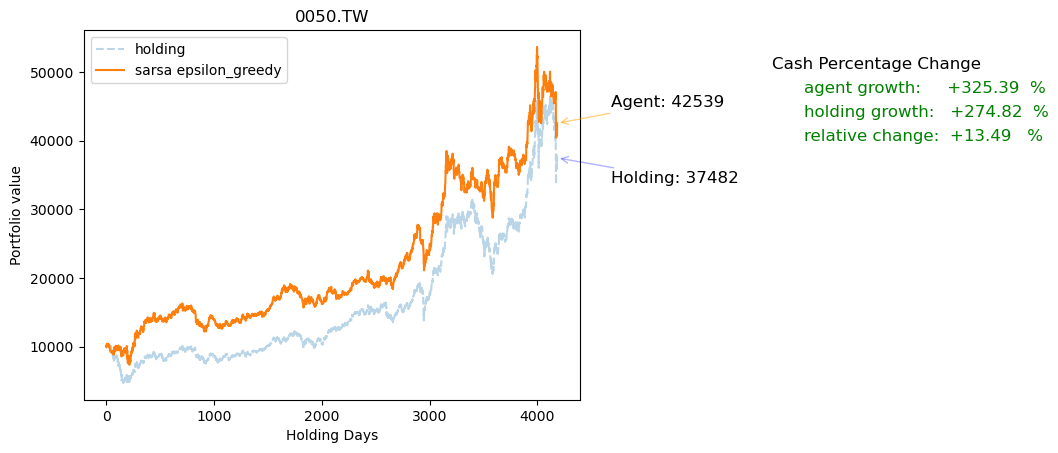

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value sarsa:
                 cash=42538.646953582764
                 shares=0.0
                 Value=42538.646953582764


In [29]:
sarsa_eps_agent = RLAgent(policy='sarsa',
                          action_policy='epsilon_greedy',
                          gamma=0.75,
                          STATES=STATES, ACTIONS=ACTIONS)
sarsa_eps_agent.train(stock_3231_data)
show_q_table(sarsa_eps_agent)
sarsa_eps_agent.evaluate_learning(stock_3231_data)

sarsa agent:
    episode   0 progressing, tau 1.0000...
    episode 100 progressing, tau 0.9000...
    episode 200 progressing, tau 0.8000...
    episode 300 progressing, tau 0.7000...
    episode 400 progressing, tau 0.6000...
    episode 500 progressing, tau 0.5000...
    episode 600 progressing, tau 0.4000...
    episode 700 progressing, tau 0.3000...
    episode 800 progressing, tau 0.3000...
    episode 900 progressing, tau 0.3000...
========== Finished Training ==========
('up', 'high', 'empty')         -> buy     buy : +0.0469  sell: -1.0063  hold: +0.0024  
('up', 'high', 'holding')       -> hold    buy : -0.9849  sell: +0.0128  hold: +0.1269  
('up', 'low', 'empty')          -> buy     buy : +0.0321  sell: -1.0131  hold: -0.0038  
('up', 'low', 'holding')        -> hold    buy : -1.0097  sell: +0.0028  hold: +0.0316  
('up', 'normal', 'empty')       -> buy     buy : +0.0368  sell: -1.0105  hold: -0.0014  
('up', 'normal', 'holding')     -> hold    buy : -0.9994  sell: +0.0016 

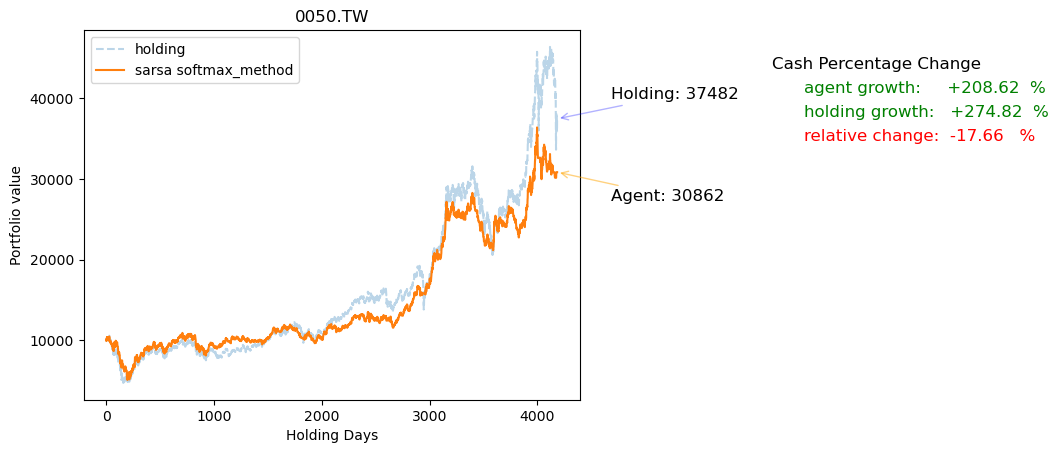

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value sarsa:
                 cash=30861.74818611145
                 shares=0.0
                 Value=30861.74818611145


In [30]:
sarsa_soft_agent = RLAgent(policy='sarsa',
                           action_policy='softmax_method',
                           gamma=0.75,
                           STATES=STATES, ACTIONS=ACTIONS)
sarsa_soft_agent.train(stock_3231_data)
show_q_table(sarsa_soft_agent)
sarsa_soft_agent.evaluate_learning(stock_3231_data)

In [31]:
a = np.array([-0.68, 0.323, 0.42], dtype=np.float64)
exp_a = np.exp(a / 1.0006)
probs = exp_a / np.sum(exp_a)
probs

array([0.14865479, 0.40505601, 0.4462892 ])

<font size='6' color='lightblue'>Deep Q-learning & Deep SARSA</font>

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

<font size='6'>Preprocess</font>

In [33]:
stock_3231_data

0050.TW,Close,volume,Trend_1,Trend_2
0,42.805260,normal,up,up
1,43.362900,normal,up,up
2,43.077106,normal,up,up
3,42.958611,normal,up,up
4,43.815971,normal,up,up
...,...,...,...,...
4180,160.550003,high,down,down
4181,160.899994,high,down,down
4182,158.600006,high,down,down
4183,155.949997,high,down,down


In [34]:
from sklearn.preprocessing import OneHotEncoder

pre_stock_data = stock_3231_data.copy()

trend_encoder = OneHotEncoder(sparse_output=False, drop=None)
trend_encode_data = trend_encoder.fit_transform(pre_stock_data[['Trend_1', 'volume']])
trend_encode_cols = trend_encoder.get_feature_names_out()
# print(trend_encode_data)
print(trend_encode_cols)
pre_stock_data[trend_encode_cols] = trend_encode_data
pre_stock_data

['Trend_1_down' 'Trend_1_up' 'volume_high' 'volume_low' 'volume_normal']


0050.TW,Close,volume,Trend_1,Trend_2,Trend_1_down,Trend_1_up,volume_high,volume_low,volume_normal
0,42.805260,normal,up,up,0.0,1.0,0.0,0.0,1.0
1,43.362900,normal,up,up,0.0,1.0,0.0,0.0,1.0
2,43.077106,normal,up,up,0.0,1.0,0.0,0.0,1.0
3,42.958611,normal,up,up,0.0,1.0,0.0,0.0,1.0
4,43.815971,normal,up,up,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4180,160.550003,high,down,down,1.0,0.0,1.0,0.0,0.0
4181,160.899994,high,down,down,1.0,0.0,1.0,0.0,0.0
4182,158.600006,high,down,down,1.0,0.0,1.0,0.0,0.0
4183,155.949997,high,down,down,1.0,0.0,1.0,0.0,0.0


In [35]:
pre_stock_data = pre_stock_data.drop(['Trend_1', 'Trend_2', 'volume'], axis=1)
pre_stock_data

0050.TW,Close,Trend_1_down,Trend_1_up,volume_high,volume_low,volume_normal
0,42.805260,0.0,1.0,0.0,0.0,1.0
1,43.362900,0.0,1.0,0.0,0.0,1.0
2,43.077106,0.0,1.0,0.0,0.0,1.0
3,42.958611,0.0,1.0,0.0,0.0,1.0
4,43.815971,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
4180,160.550003,1.0,0.0,1.0,0.0,0.0
4181,160.899994,1.0,0.0,1.0,0.0,0.0
4182,158.600006,1.0,0.0,1.0,0.0,0.0
4183,155.949997,1.0,0.0,1.0,0.0,0.0


In [36]:
pre_stock_data[pre_stock_data.columns[1:]] = \
    pre_stock_data[pre_stock_data.columns[1:]].astype(np.int8)
pre_stock_data

0050.TW,Close,Trend_1_down,Trend_1_up,volume_high,volume_low,volume_normal
0,42.805260,0,1,0,0,1
1,43.362900,0,1,0,0,1
2,43.077106,0,1,0,0,1
3,42.958611,0,1,0,0,1
4,43.815971,0,1,0,0,1
...,...,...,...,...,...,...
4180,160.550003,1,0,1,0,0
4181,160.899994,1,0,1,0,0
4182,158.600006,1,0,1,0,0
4183,155.949997,1,0,1,0,0


In [37]:
pre_input_size = len(pre_stock_data.columns) - 1
pre_input_size

5

<font size='6'>Create a ReplayBuffer</font>

In [38]:
import os
mw_dir = os.path.join(os.getcwd(), 'model_weights')
os.makedirs(mw_dir, exist_ok=True)

In [39]:
class ReplayBuffer:
    def __init__(self, input_size, max_size=5e3, *, batch_size=32):
        self.max_size = int(max_size)
        self.batch_size = batch_size   
        
        state_dtype = np.dtype((np.int8, (input_size,)))
        self.states = np.empty((self.max_size,), dtype=state_dtype)
        self.actions = np.empty((self.max_size,), dtype=np.int8)
        self.rewards = np.empty((self.max_size,), dtype=np.float32)
        self.next_states = np.empty((self.max_size,), dtype=state_dtype)
        self.next_actions = np.empty((self.max_size,), dtype=np.int8)
        self.dones = np.empty((self.max_size,), dtype=np.int8)
        self.index = 0
        self.full = False

    def store(self, state, action, reward,
              next_state, done, next_action=None):
        self.states[self.index] = state
        self.actions[self.index] = action
        self.rewards[self.index] = reward
        self.next_states[self.index] = next_state
        self.dones[self.index] = done
        self.next_actions[self.index] = next_action

        self.index = (self.index + 1) % self.max_size
        self.full = True if self.index == 0 else False

    def get_samples(self) -> tuple[np.ndarray, ...]:
        max_idx = self.max_size if self.full else self.index
        batch_idx = np.random.choice(max_idx, self.batch_size, replace=False)

        return (
            self.states[batch_idx],
            self.actions[batch_idx],
            self.rewards[batch_idx],
            self.next_states[batch_idx],
            self.dones[batch_idx],
            self.next_actions[batch_idx],
        )

In [40]:
class ActionPolicy:
    def choose_action(self, q_values, evaluate=False):
        raise NotImplementedError

class EpsilonGreedy(ActionPolicy):
    def __init__(self, epsilon=1, eps_dec=1e-3, eps_min=0.1):
        self.epsilon = epsilon
        self.eps_dec = eps_dec
        self.eps_min = eps_min

    def choose_action(self, q_values, evaluate=False):
        epsilon = self.epsilon if not evaluate else 0

        if np.random.rand() < epsilon: # exploration
            return np.random.randint(len(ACTIONS))
        else : # exploitation
            return np.argmax(q_values)

    def decay(self):
        ## version 1: fast drop at the beginning
        # self.epsilon = self.epsilon * (1 - self.eps_dec) \
        #     if self.epsilon > self.eps_min \
        #     else self.eps_min
        ## version 2: gradually drop
        self.epsilon = self.epsilon - self.eps_dec \
                        if self.epsilon > self.eps_min \
                        else self.eps_min 

class SoftmaxMethod(ActionPolicy):
    def __init__(self, tau=1, tau_dec=1e-3, tau_min=0.3):
        self.tau = tau
        self.tau_dec = tau_dec
        self.tau_min = tau_min

    def choose_action(self, q_values, evaluate=False):
        tau = self.tau if not evaluate else 1e-2

        exp_q_values = np.exp(q_values / tau)
        prob_q_values = exp_q_values / np.sum(exp_q_values)

        return np.random.choice(prob_q_values.shape[0], p=prob_q_values)

    def decay(self):
        ## version 1: fast drop at the beginning
        # self.tau = self.tau * (1 - self.tau_dec) \
        #     if self.tau > self.tau_min \
        #     else self.tau_min
        ## version 2: gradually drop
        self.tau = self.tau - self.tau_dec \
                    if self.tau > self.tau_min \
                    else self.tau_min 

In [41]:
## TODO understand how it works
# @tf.function
# def train_on_batch(model, states, q_values):
#     model.train_on_batch(states, q_values)

# @tf.function
# def predict_q(model, states: tf.Tensor) -> np.ndarray:
#     return model(states, training=False)

In [42]:
class DRLAgent:
    def __init__(self, action_policy: ActionPolicy,
                 state_size=None, action_size=None,
                 alpha=0.001, gamma=0.9,
                 episodes=1000,
                 batch_size_=32):
        self.action_policy = action_policy
        self.state_size = state_size
        self.action_size = action_size

        self.alpha = alpha
        self.gamma = gamma
        self.episodes = episodes
        self.batch_size = batch_size_

        self.policy = None
        self.apn = None
        self.nL1 = self.action_size
        self.nL2 = None

        self.replay_freq = 32
        self.sync_freq = 100

    def initialize(self):
        if self.state_size:
            ## Initialize Networks
            self.q_network = self._build_mode(self.nL1, self.nL2)
            self.t_network = self._build_mode(self.nL1, self.nL2)
            self._sync_qt_networks()

            ## Experience Replay Buffer
            self.memory = ReplayBuffer(input_size=self.state_size, batch_size=self.batch_size)
        else :
            raise ValueError('Agent has not received state_size yet')
        
    def load_weight(self, load_file):
        if os.path.isfile(load_file):
            self.q_network.load_weights(load_file)
        else :
            raise ValueError(f'{load_file} does not exist')

    def _sync_qt_networks(self):
        self.t_network.set_weights(self.q_network.get_weights())

    def _build_mode(self, n1, n2=None):
        layers = [
            Input(shape=(self.state_size,)),
            Dense(n1, activation='relu'),
        ]
        if n2 != None:
            layers.append(Dense(n2, activation='relu'))

        layers.append(Dense(self.action_size, activation='linear'),)

        model = Sequential(layers)
        model.compile(
            optimizer=Adam(learning_rate=self.alpha),
            loss='mse',
            # jit_compile=False,
        )
        return model

    def _get_reward(self, current_price, previous_price, buy_price, portfolio, action):
        ## version 2
        # invalid action
        if action == 0 and portfolio == 1:
            return -2 # buy when holding
        if action == 1 and portfolio == 0:
            return -2 # sell when empty

        # valid action
        if action == 0: # buy
            r = 0.03
            return r

        elif action == 1: # sell
            r = (current_price - buy_price) / buy_price
            if portfolio == 1: # holding
                r += (current_price - previous_price) / previous_price

            return r

        else : # hold
            r = (current_price - previous_price) / previous_price
            if portfolio == 1: # holding
                r += (current_price - buy_price) / buy_price
            else : # empty
                r *= -1 

            if r > 0: # rewared holding positive behavior
                r *= 1.2 

            return r

    def _replay_experience(self):
        if self.memory.index < self.batch_size and not self.memory.full:
            return # memory not enough for a batch

        states, actions, rewards, \
        next_states, dones, next_actions = self.memory.get_samples()

        # predict the max next q value
        q_values = self.q_network.predict_on_batch(states)
        next_q_values = self.t_network.predict_on_batch(next_states)
        
        # max next q values: max action values for update
        max_next_q_values = self._get_max_next_q_values(next_q_values, next_actions)

        ## update q values
        q_values[np.arange(self.batch_size), actions] = \
            rewards \
            + (1 - dones) * self.gamma * max_next_q_values

        ## train q-network
        self.q_network.train_on_batch(states, q_values)

    def _get_max_next_q_values(self, next_q_values, next_actions):
        raise NotImplementedError

    def train(self, df):
        print(f"{self.policy} {self.apn} agent:")
        close_prices = df['Close'].values
        feature_cols = df.values[:, 1:]
        for episode in range(self.episodes):
            if episode % 100 == 0:
                print('    ', end='')
                if self.apn == 'epsilon_greedy':
                    print(f"episode {episode:>3} progressing, "
                          f"epsilon {self.action_policy.epsilon:>.4f} ...")
                else :
                    print(f"episode {episode:>3} progressing, "
                          f"tau {self.action_policy.tau:>.4f} ...")

            index = 1
            portfolio = 0 # 0 as empty, 1 as holding
            buy_price = 0

            ## Initial state & action
            state = np.append(feature_cols[index], portfolio) # shape=(6,)
            q_values = self.q_network.predict_on_batch(state[np.newaxis, :]) # shape=(1,3)
            action = self.action_policy.choose_action(q_values[0]) # output => int

            ## go through every rows
            while index < len(df) - 1:
                # if index % 1000 == 0:
                #     print(index)

                current_price = close_prices[index]
                previous_price = close_prices[index - 1]

                ## get reward
                reward = self._get_reward(current_price, previous_price,
                                          buy_price, state[-1], action)

                ## execute action
                if action == 0 and portfolio == 0: # buy when empty
                    buy_price = current_price
                    portfolio = 1
                elif action == 1 and portfolio == 1: # sell when holding
                    buy_price = 0
                    portfolio = 0

                # TODO: understand why done is necessary, when still in loop
                done = 0 if (index != len(df) - 2) else 1

                ## set next state & action
                next_state = np.append(feature_cols[index + 1], portfolio)
                next_action = self._get_policy_next_action(next_state[np.newaxis, :])

                ## store experience
                self.memory.store(state, action, reward,
                                  next_state, done, next_action)

                ## update q value                
                if index % self.replay_freq == 0:
                    self._replay_experience()

                ## update network
                if index % self.sync_freq == 0:
                    self._sync_qt_networks()

                ## update state & action
                state = next_state
                action = self._update_action(next_state[np.newaxis, :] , next_action)

                index += 1
            
            ## decay
            self.action_policy.decay()

        print("=" * 10, "Finishing Training", "=" * 10)
        ## save weights
        self.q_network.save_weights(
            os.path.join(mw_dir, f'{self.policy}_{self.apn}.weights.h5')
        )
    
    def _get_policy_next_action(self, next_state):
        raise NotImplementedError

    def _update_action(self, next_state, next_action):
        raise NotImplementedError
    
    def evaluate_Dlearning(self, df, initial_cash=10000):
        ## Initial status
        # holding from begin
        cash_holding = initial_cash
        shares_holding = 0
        # q
        cash = initial_cash
        shares = 0
        portfolio = 0

        index = 1
        
        # holding from begin
        shares_holding = cash_holding // df.values[index, 0]
        cash_holding -= shares_holding * df.values[index, 0]

        ## document
        values_holding = []
        values_Dlearning = []

        close_prices = df['Close'].values
        feature_cols = df.iloc[:, 1:].values
        while index < len(df):
            current_price = close_prices[index]

            # set state & action
            state = np.append(feature_cols[index], portfolio)
            q_values = self.q_network.predict_on_batch(state.reshape(1, -1))
            action = self.action_policy.choose_action(q_values[0], evaluate=True)

            # execute action
            if action == 0 and portfolio == 0:
                # buy when empty
                shares = cash // current_price
                cash -= shares * current_price
                portfolio = 1
            elif action == 1 and portfolio == 1:
                # sell when holding
                cash += shares * current_price
                shares = 0
                portfolio = 0

            values_holding.append(cash_holding + shares_holding * df.values[index, 0])
            values_Dlearning.append(cash + shares * df.values[index, 0])

            index += 1

        ## plot fig
        apc = 100 * (values_Dlearning[-1] - initial_cash) / initial_cash
        hpc = 100 * (values_holding[-1] - initial_cash) / initial_cash
        cpc = 100 * (values_Dlearning[-1] - values_holding[-1]) / values_holding[-1]

        apc_c = 'green' if apc >= 0 else 'red'
        hpc_c = 'green' if hpc >= 0 else 'red'
        cpc_c = 'green' if cpc >= 0 else 'red'

        text_diff = 3000 if cpc >= 0 else -3000

        plt.plot(values_holding, label="holding", alpha=0.3, linestyle='--')
        plt.plot(values_Dlearning, label=f"{self.policy} {self.apn}")
        plt.annotate(f"Agent: {values_Dlearning[-1]:.0f}",
                     xy=(len(values_Dlearning), values_Dlearning[-1]),
                     xytext=(len(values_Dlearning) + 500, values_Dlearning[-1] + text_diff),
                     fontsize=12,
                     ha='left',
                     va='center',
                     arrowprops={
                         'arrowstyle': "->",
                         'color': 'orange',
                         'alpha': 0.5,
                     })
        plt.annotate(f"Holding: {values_holding[-1]:.0f}",
                     xy=(len(values_holding), values_holding[-1]),
                     xytext=(len(values_holding) + 500, values_holding[-1] - text_diff),
                     fontsize=12,
                     ha='left',
                     va='center',
                     arrowprops={
                         'arrowstyle': "->",
                         'color': 'blue',
                         'alpha': 0.3,
                     })
        plt.xlabel('Holding Days')
        plt.ylabel('Portfolio value')
        plt.title(f"{stock_no}")
        plt.figtext(1.2, 0.8, 'Cash Percentage Change', fontsize=12)
        plt.figtext(1.25, 0.75, f'agent growth:    {apc:^+9.2f} %', fontsize=12, color=apc_c)
        plt.figtext(1.25, 0.7,  f'holding growth:  {hpc:^+9.2f} %', fontsize=12, color=hpc_c)
        plt.figtext(1.25, 0.65, f'relative change: {cpc:^+9.2f} %', fontsize=12, color=cpc_c)
        plt.legend()

        ## save fig
        images_dir = os.path.join(os.getcwd(), 'images')
        os.makedirs(images_dir, exist_ok=True)
        fig_fname = f'{self.policy}_{self.apn}.png'
        plt.savefig(os.path.join(images_dir, fig_fname), bbox_inches='tight')

        ## show fig
        plt.show()

        print(f"Final value holding:\n \
                cash={cash_holding}\n \
                shares={shares_holding * df.values[-1, 0]}\n \
                Value={values_holding[-1]}")
        print(f"Final value {self.policy}:\n \
                cash={cash}\n \
                shares={shares * df.values[-1, 0]}\n \
                Value={values_Dlearning[-1]}")

In [43]:
class DQNAgent(DRLAgent):
    def __init__(self, action_policy,
                 state_size, action_size,
                 alpha=0.001, gamma=0.9,
                 episodes=1000,
                 batch_size_=32, *, apn):
        super().__init__(action_policy,
                         state_size, action_size,
                         alpha, gamma,
                         episodes,
                         batch_size_)
        self.policy = 'DQN'
        self.apn = apn

    # return (32, 1) array
    def _get_max_next_q_values(self, next_q_values, next_actions):
        return np.max(next_q_values, axis=1)

    # return index of action
    def _get_policy_next_action(self, next_state):
        return -1

    # return index of action
    def _update_action(self, next_state, next_action):
        q_values = self.q_network.predict_on_batch(next_state)
        return self.action_policy.choose_action(q_values[0])

class DsarsaAgent(DRLAgent):
    def __init__(self, action_policy,
                 state_size, action_size,
                 alpha=0.001, gamma=0.9,
                 episodes=1000,
                 batch_size_=32, *, apn):
        super().__init__(action_policy,
                         state_size, action_size,
                         alpha, gamma,
                         episodes,
                         batch_size_)
        self.policy = 'Dsarsa'
        self.apn = apn

    # return (32, 1) array
    def _get_max_next_q_values(self, next_q_values, next_actions):
        return next_q_values[np.arange(self.batch_size), next_actions]

    # return index of action
    def _get_policy_next_action(self, next_state):
        next_q_values = self.q_network.predict_on_batch(next_state)
        return self.action_policy.choose_action(next_q_values[0])

    # return index of action
    def _update_action(self, next_state, next_action) -> int:
        return next_action


In [44]:
# state_size: ([trend_down, trend_up], [volume_high, volume_low, volume_normal], portfolio_status) 
# action_size: [buy, sell, hold]

test_D_data = np.array(STATES)

encoded_data = np.column_stack([
    (test_D_data[:, 0] == 'down').astype(int),
    (test_D_data[:, 0] == 'up').astype(int),
    (test_D_data[:, 1] == 'high').astype(int),
    (test_D_data[:, 1] == 'low').astype(int),
    (test_D_data[:, 1] == 'normal').astype(int),
    (test_D_data[:, 2] == 'holding').astype(int),
])
# encoded_data


In [45]:
def show_performance(Dagent):
    test_q_values = Dagent.q_network.predict_on_batch(encoded_data)

    test_actions = np.argmax(test_q_values, axis=1)
    condiitons = [
        test_actions == 0,
        test_actions == 1,
        test_actions == 2,
    ]
    choices = ['buy', 'sell', 'hold']
    test_actions = np.select(condiitons, choices)
    for i, v in enumerate(test_D_data):
        print(f"{str(v):<29}-> {test_actions[i]}\t", end='')
        for j, n in enumerate(ACTIONS):
            if j != len(ACTIONS) - 1:
                print(f"{n}:{test_q_values[i, j]:>+8.4f}", end='\t')
            else :
                print(f"{n}:{test_q_values[i, j]:>+8.4f}")

    Dagent.evaluate_Dlearning(pre_stock_data)


DQN epsilon_greedy agent:
    episode   0 progressing, epsilon 1.0000 ...
    episode 100 progressing, epsilon 0.9000 ...
    episode 200 progressing, epsilon 0.8000 ...
    episode 300 progressing, epsilon 0.7000 ...
    episode 400 progressing, epsilon 0.6000 ...
    episode 500 progressing, epsilon 0.5000 ...
    episode 600 progressing, epsilon 0.4000 ...
    episode 700 progressing, epsilon 0.3000 ...
    episode 800 progressing, epsilon 0.2000 ...
    episode 900 progressing, epsilon 0.1000 ...
========== Finishing Training ==========
['up' 'high' 'empty']        -> buy	buy: +0.2479	sell: -1.7632	hold: +0.2319
['up' 'high' 'holding']      -> hold	buy: -1.7556	sell: +0.2409	hold: +0.2515
['up' 'low' 'empty']         -> buy	buy: +0.2535	sell: -1.7592	hold: +0.2297
['up' 'low' 'holding']       -> hold	buy: -1.7425	sell: +0.2430	hold: +0.2569
['up' 'normal' 'empty']      -> buy	buy: +0.2491	sell: -1.7661	hold: +0.2321
['up' 'normal' 'holding']    -> hold	buy: -1.7582	sell: +0.2391	ho

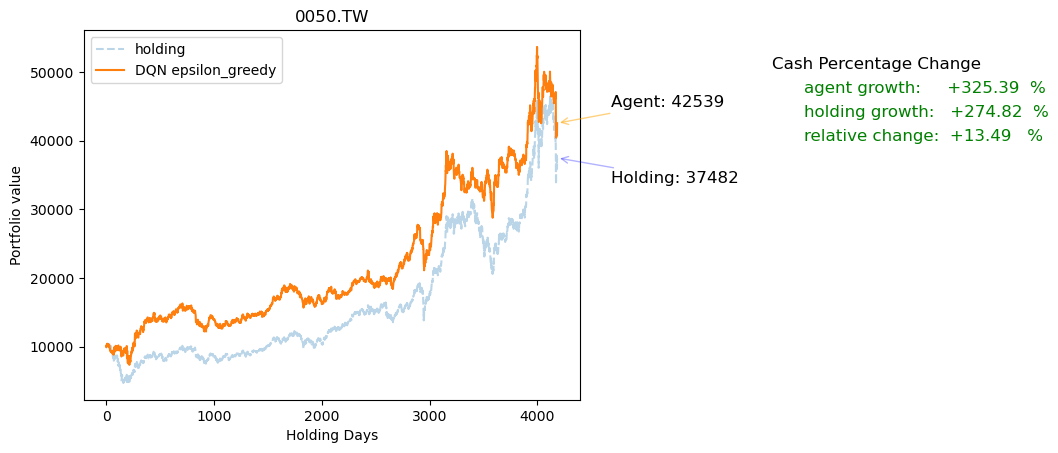

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value DQN:
                 cash=42538.646953582764
                 shares=0.0
                 Value=42538.646953582764


In [46]:
Dqn_eps_agent = DQNAgent(action_policy=EpsilonGreedy(),
                         state_size=pre_input_size + 1,
                         action_size=len(ACTIONS),
                         apn='epsilon_greedy')
Dqn_eps_agent.initialize()
Dqn_eps_agent.train(pre_stock_data)
show_performance(Dqn_eps_agent)

DQN softmax_method agent:
    episode   0 progressing, tau 1.0000 ...
    episode 100 progressing, tau 0.9000 ...
    episode 200 progressing, tau 0.8000 ...
    episode 300 progressing, tau 0.7000 ...
    episode 400 progressing, tau 0.6000 ...
    episode 500 progressing, tau 0.5000 ...
    episode 600 progressing, tau 0.4000 ...
    episode 700 progressing, tau 0.3000 ...
    episode 800 progressing, tau 0.3000 ...
    episode 900 progressing, tau 0.3000 ...
========== Finishing Training ==========
['up' 'high' 'empty']        -> buy	buy: +0.1692	sell: -1.8401	hold: +0.1533
['up' 'high' 'holding']      -> sell	buy: -1.8868	sell: +0.1636	hold: +0.1430
['up' 'low' 'empty']         -> buy	buy: +0.1692	sell: -1.8401	hold: +0.1533
['up' 'low' 'holding']       -> sell	buy: -1.8848	sell: +0.1618	hold: +0.1431
['up' 'normal' 'empty']      -> buy	buy: +0.1692	sell: -1.8401	hold: +0.1533
['up' 'normal' 'holding']    -> sell	buy: -1.8828	sell: +0.1576	hold: +0.1419
['down' 'high' 'empty']     

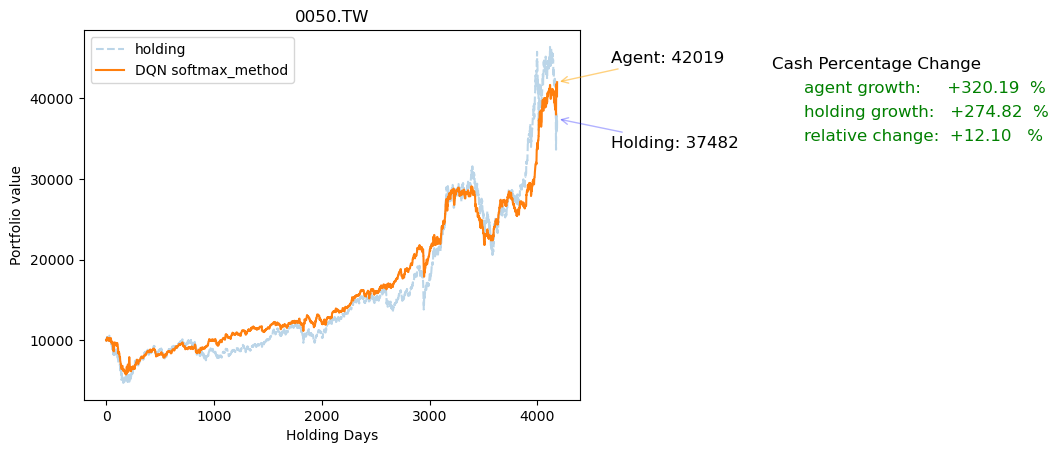

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value DQN:
                 cash=42018.74310684204
                 shares=0.0
                 Value=42018.74310684204


In [47]:
Dqn_soft_agent = DQNAgent(action_policy=SoftmaxMethod(),
                          state_size=pre_input_size + 1,
                          action_size=len(ACTIONS),
                          apn='softmax_method')
Dqn_soft_agent.initialize()
Dqn_soft_agent.train(pre_stock_data)
show_performance(Dqn_soft_agent)

Dsarsa epsilon_greedy agent:
    episode   0 progressing, epsilon 1.0000 ...
    episode 100 progressing, epsilon 0.9000 ...
    episode 200 progressing, epsilon 0.8000 ...
    episode 300 progressing, epsilon 0.7000 ...
    episode 400 progressing, epsilon 0.6000 ...
    episode 500 progressing, epsilon 0.5000 ...
    episode 600 progressing, epsilon 0.4000 ...
    episode 700 progressing, epsilon 0.3000 ...
    episode 800 progressing, epsilon 0.2000 ...
    episode 900 progressing, epsilon 0.1000 ...
========== Finishing Training ==========
['up' 'high' 'empty']        -> buy	buy: -0.1205	sell: -2.1326	hold: -0.1878
['up' 'high' 'holding']      -> sell	buy: -2.1113	sell: -0.1663	hold: -0.1935
['up' 'low' 'empty']         -> buy	buy: -0.1195	sell: -2.1040	hold: -0.1795
['up' 'low' 'holding']       -> sell	buy: -2.0850	sell: -0.1650	hold: -0.1858
['up' 'normal' 'empty']      -> buy	buy: -0.1195	sell: -2.1043	hold: -0.1796
['up' 'normal' 'holding']    -> sell	buy: -2.1176	sell: -0.1302

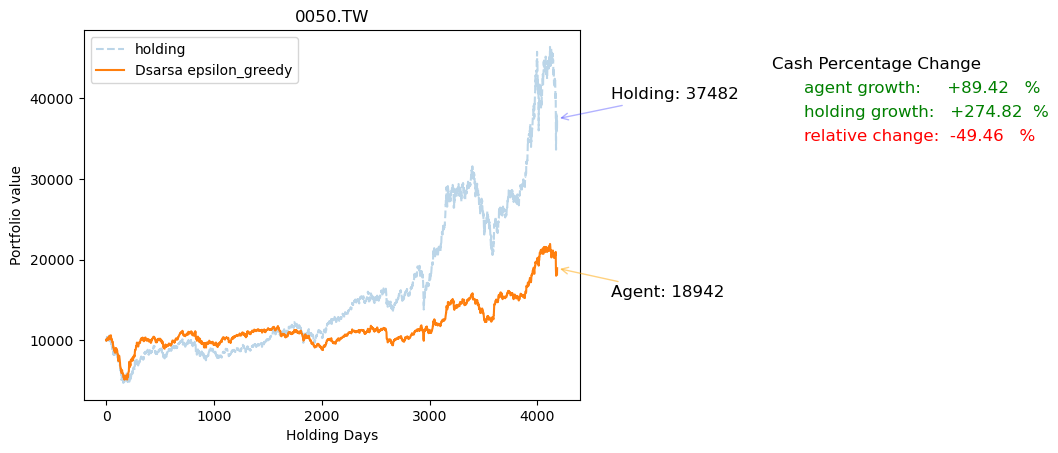

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value Dsarsa:
                 cash=18942.392107009888
                 shares=0.0
                 Value=18942.392107009888


In [48]:
Dsarsa_eps_agent = DsarsaAgent(action_policy=EpsilonGreedy(),
                               state_size=pre_input_size + 1,
                               action_size=len(ACTIONS),
                               gamma=0.75,
                               apn='epsilon_greedy')
Dsarsa_eps_agent.initialize()
Dsarsa_eps_agent.train(pre_stock_data)
show_performance(Dsarsa_eps_agent)

Dsarsa softmax_method agent:
    episode   0 progressing, tau 1.0000 ...
    episode 100 progressing, tau 0.9000 ...
    episode 200 progressing, tau 0.8000 ...
    episode 300 progressing, tau 0.7000 ...
    episode 400 progressing, tau 0.6000 ...
    episode 500 progressing, tau 0.5000 ...
    episode 600 progressing, tau 0.4000 ...
    episode 700 progressing, tau 0.3000 ...
    episode 800 progressing, tau 0.3000 ...
    episode 900 progressing, tau 0.3000 ...
========== Finishing Training ==========
['up' 'high' 'empty']        -> hold	buy: -0.2149	sell: -2.1220	hold: -0.1589
['up' 'high' 'holding']      -> hold	buy: -1.5804	sell: -0.7998	hold: -0.2410
['up' 'low' 'empty']         -> hold	buy: -1.5804	sell: -0.7998	hold: -0.2410
['up' 'low' 'holding']       -> hold	buy: -1.5804	sell: -0.7998	hold: -0.2410
['up' 'normal' 'empty']      -> hold	buy: -0.1956	sell: -2.1407	hold: -0.1577
['up' 'normal' 'holding']    -> hold	buy: -1.5804	sell: -0.7998	hold: -0.2410
['down' 'high' 'empty'

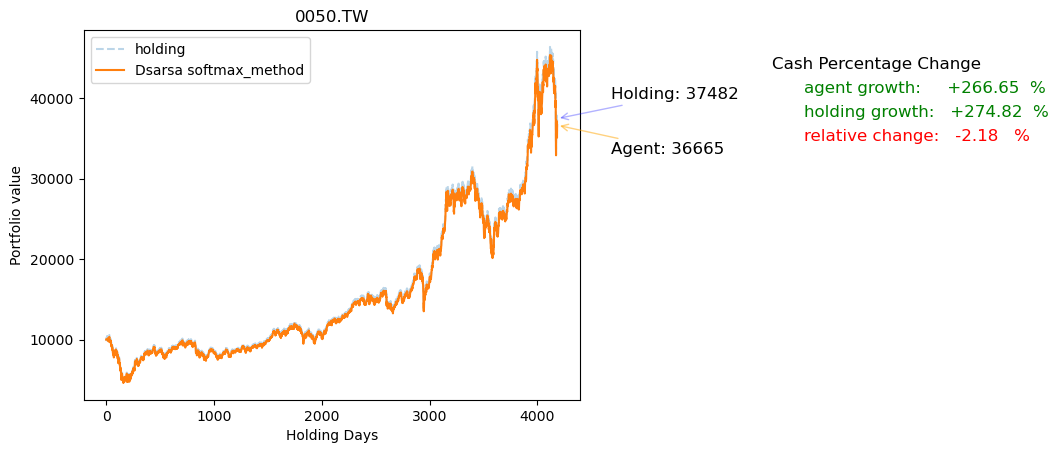

Final value holding:
                 cash=26.533050537109375
                 shares=37455.501403808594
                 Value=37482.0344543457
Final value Dsarsa:
                 cash=23.781490325927734
                 shares=36641.251373291016
                 Value=36665.03286361694


In [49]:
Dsarsa_soft_agent = DsarsaAgent(action_policy=SoftmaxMethod(),
                                state_size=pre_input_size + 1,
                                action_size=len(ACTIONS),
                                gamma=0.75,
                                apn='softmax_method')
Dsarsa_soft_agent.initialize()
Dsarsa_soft_agent.train(pre_stock_data)
show_performance(Dsarsa_soft_agent)

In [50]:
a = np.array([0.15, -1.85, 0.44])
exp_a = np.exp(a / 0.1)
probs = exp_a / np.sum(exp_a)
probs

array([5.21535631e-02, 1.07496505e-10, 9.47846437e-01])

In [51]:
# itertools, random, collections
## use CATPCA to encode action

In [52]:
## encoding using astype
# portfolio_col_bi = np.where(test_D_data[:, 2] == 'holding', 1, 0)
# portfolio_col_bi = (test_D_data[:, 2] == 'holding').astype(int)
# portfolio_col_bi